# **INFORMATION**

---



***IMPORT LIBRARIES***

---



In [ ]:
# data analysis
import numpy as np
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


***DATA PROCESSING***

---



In [ ]:
data = pd.read_csv('titanic.csv') #LOADING DATA

In [ ]:
data.shape


(891, 12)

In [ ]:
data.columns #CHECKING COLUMNS

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
interval = (0, 5, 12, 18, 25, 35, 80)

filters = ['Babies', 'Children', 'Teen' ,'Young', 'Adult', 'Senior']
data["Age_filters"] = pd.cut(data.Age, interval, labels=filters)


In [ ]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filters
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


***DETAILS***

---



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_filters  714 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


***CHECK MISSING VALUES***

---



In [ ]:
data.isnull().sum() # I'm checking for null data.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_filters    177
dtype: int64

***FILL MISSING VALUES***

---



In [ ]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filters
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Senior
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Senior


***ANALYSING THE VARIABLES***

---



In [ ]:
#AGE DISTRIBUTION
data.groupby(["Sex","Survived"]).Survived.count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

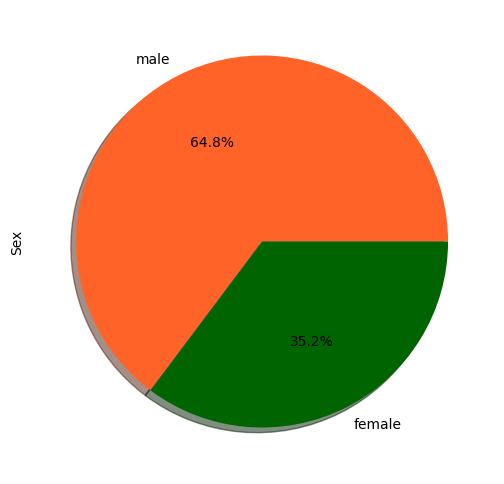

In [ ]:
colors = ["#FF6327","#006400"] # Colors Set
f,ax = plt.subplots(figsize=(6,8))

data["Sex"].value_counts().plot.pie(autopct="%1.1f%%",ax=ax,shadow=True,colors=colors)
plt.show()

Text(0.5, 1.0, 'Age Values Distribution')

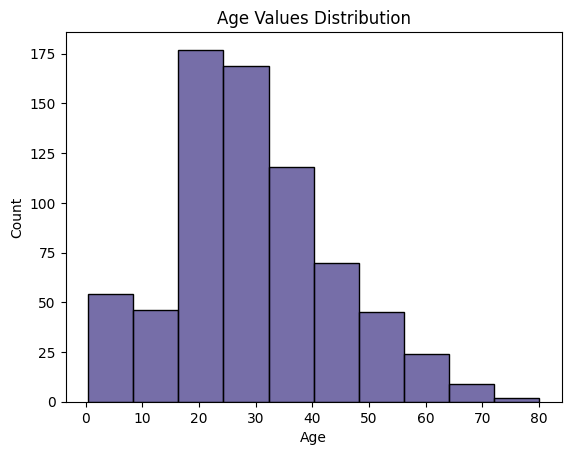

In [ ]:
#HISTOGRAM OF AGE VALUES DISTRIBUTION
sns.histplot(data=data,x='Age',bins=10,color="#483D8B")
plt.title("Age Values Distribution")

In [ ]:
#DISTRIBUTION ON DIFFERENT AGE GROUPS
age_counts = data.groupby("Age_filters").size()
age_counts

Age_filters
Babies       44
Children     25
Teen         70
Young       162
Adult       196
Senior      217
dtype: int64

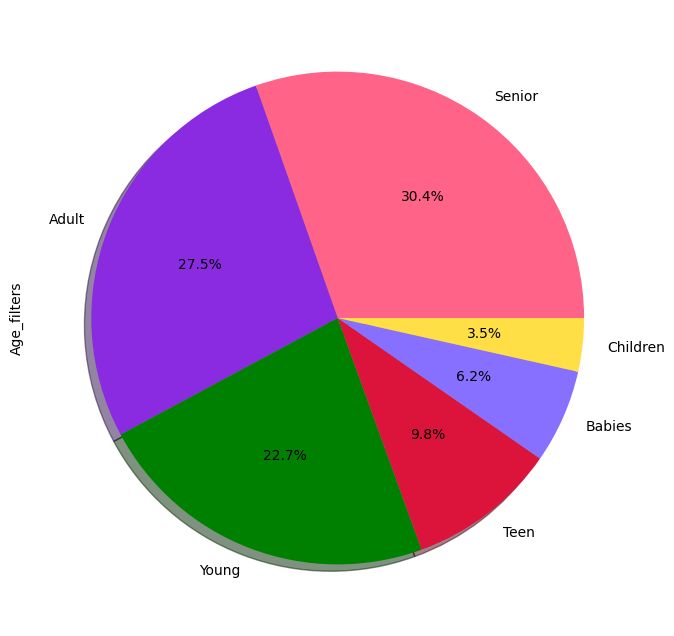

In [ ]:
colors = ["#FF6387","#8A2BE2","green","#DC143C","#8770ff","#ffde46"] # Colors Set
f,ax = plt.subplots(figsize=(8,8))

data["Age_filters"].value_counts().plot.pie(autopct="%1.1f%%",ax=ax,shadow=True,colors=colors)
plt.show()

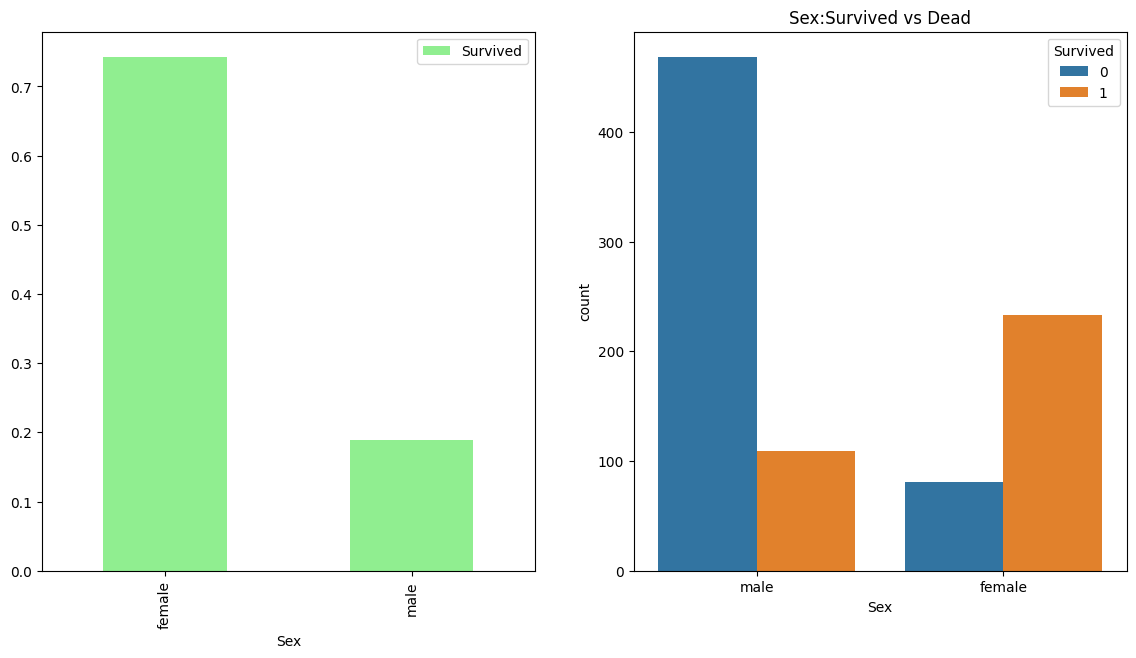

In [ ]:
f,ax = plt.subplots(1,2,figsize=(14,7))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0],color="lightgreen")
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
plt.title("Sex:Survived vs Dead")
plt.show()

#SURVIVAL OF FEMALE PASSENGER IS HIGHER THAN MEN PASSENGERS

In [ ]:
#Pclass vs Survived
data[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
#Sex vs Survived
data[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
#SibSp vs Survived
data[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
#Parch vs Survived
data[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000
